In [1]:
import numpy as np
loc = 'data/embed1000_self.npz'
fin = np.load(loc);
input_locations =fin['loc']
input_locations = input_locations.astype(np.float);
print(input_locations.shape);

(1000, 300)


In [2]:
from sklearn.cluster import KMeans
label_num = 1000;
locations_list = []
index_list = [];
locations = input_locations
locations_list.append(locations);
cfgs = [10,10,10]

In [3]:
for cfg in cfgs:
    m = label_num/cfg;
    kmeans = KMeans(n_clusters=m, random_state=0, n_jobs=-1)
    results = kmeans.fit(locations);
    label_count = [0 for i in range(m)];
    for i in range(label_num):
        label_count[results.labels_[i]] += 1;
    maximum = (max(label_count));
    label_count = [0 for i in range(m)];
    index = np.ones((m, maximum)) * label_num;
    for i in range(label_num):
        id = results.labels_[i];
        index[id][label_count[id]] = i;
        label_count[id] += 1;
    new_locations = results.cluster_centers_;
    locations_list.append(new_locations);
    index_list.append(index);
    locations = new_locations;
    label_num = m;

In [4]:
np.savez('data/20news_sparse_1000_self.npz', locations = locations_list, index=index_list);

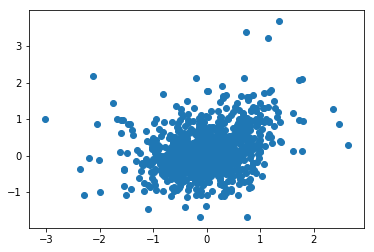

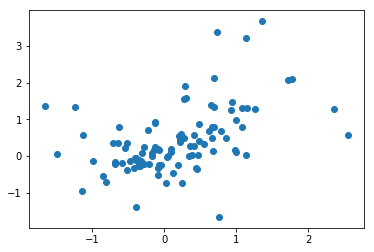

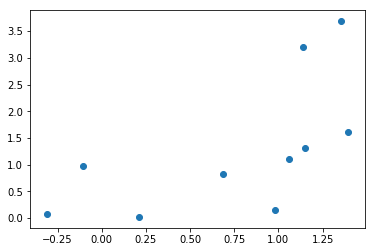

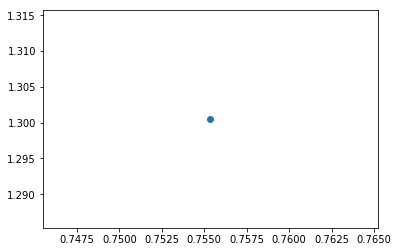

In [5]:
import matplotlib.pyplot as plt
x = 0;
for locations in locations_list:
    plt.figure(x)
    plt.scatter(locations[:,0], locations[:,1]);
    plt.show()
    x += 1;

In [15]:
for tmp in index_list:
    print(tmp.shape)

(100, 83)
(10, 46)
(1, 10)
